In [1]:
import csv
import sys
import codecs
import nltk
import nltk.collocations
import collections
import statistics
from nltk.metrics.spearman import *
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from os import listdir
from os.path import splitext
from os.path import basename
from tabulate import tabulate

In [2]:
import pandas as pd

In [3]:
import string

In [4]:
full_df = pd.read_csv('/Users/nguyenquangminhnguyet/Documents/HKBU Study/Doctoral/System justification/Data/International_news.csv')

In [5]:
df = full_df[["Content"]]

In [6]:
df["Content"] = df["Content"].astype(str)

/Users/nguyenquangminhnguyet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
full_df.head()

,Date,Content
0,Dec-19,"On January 1 of this year, a new cybersecurity..."
1,Aug-19,"The new rules, issued in a decree on Wednesday..."
2,Jan-19,"On the first day of 2019, Vietnamese dissident..."
3,Jun-18,The huge nationwide protests that rocked Vietn...
4,Oct-16,Vietnam’s newly enacted cybersecurity law show...


In [8]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(Content):
    """custom function to remove the punctuation"""
    return Content.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Content_wo_punct"] = df["Content"].apply(lambda Content: remove_punctuation(Content))
df.head()

,Content,Content_wo_punct
0,"On January 1 of this year, a new cybersecurity...",On January 1 of this year a new cybersecurity ...
1,"The new rules, issued in a decree on Wednesday...",The new rules issued in a decree on Wednesday ...
2,"On the first day of 2019, Vietnamese dissident...",On the first day of 2019 Vietnamese dissidents...
3,The huge nationwide protests that rocked Vietn...,The huge nationwide protests that rocked Vietn...
4,Vietnam’s newly enacted cybersecurity law show...,Vietnam’s newly enacted cybersecurity law show...


In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not','the', 'The','really','sometimes', 'go', 'since', 'they', 'its', 'the', 'said', 'many', 'also', 'according', 'would'])

In [10]:
def remove_stopwords(Content):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(Content).split() if word not in stop_words])

df["Content_wo_stop"] = df["Content_wo_punct"].apply(lambda Content: remove_stopwords(Content))
df.head()

,Content,Content_wo_punct,Content_wo_stop
0,"On January 1 of this year, a new cybersecurity...",On January 1 of this year a new cybersecurity ...,On January 1 year new cybersecurity law entere...
1,"The new rules, issued in a decree on Wednesday...",The new rules issued in a decree on Wednesday ...,new rules issued decree Wednesday apply social...
2,"On the first day of 2019, Vietnamese dissident...",On the first day of 2019 Vietnamese dissidents...,On first day 2019 Vietnamese dissidents human ...
3,The huge nationwide protests that rocked Vietn...,The huge nationwide protests that rocked Vietn...,huge nationwide protests rocked Vietnam last w...
4,Vietnam’s newly enacted cybersecurity law show...,Vietnam’s newly enacted cybersecurity law show...,Vietnam’s newly enacted cybersecurity law show...


In [11]:
data = df.Content_wo_stop.values.tolist()

In [12]:
new_text = " ".join(map(str,data))

In [13]:
words = [word for word in new_text.split() if word.lower() not in stop_words]

In [14]:
clean = [w.lower() for w in words if w.isalpha()]

In [15]:
text = [w for w in clean if w not in stop_words]

In [16]:
# creates a variable for the lemmatizing function
wnl = WordNetLemmatizer()

In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nguyenquangminhnguyet/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# lemmatizes all of the verbs
lemm = []
for word in text:
    lemm.append(wnl.lemmatize(word, 'v'))

In [19]:
# lemmatizes all of the nouns 
lems = []
for word in lemm:
    lems.append(wnl.lemmatize(word, 'n'))

In [20]:
print("Number of words:", len(lems))

Number of words: 106137


In [96]:
print('cyber:', text.count('cyber'))

cyber: 260


In [97]:
# prints the 10 most common bigrams
colText = nltk.Text(lems)
colText.collocations(50)


human right; social medium; cybersecurity law; national assembly;
communist party; service provider; public security; chi minh; ministry
public; facebook google; freedom expression; last year; amnesty
international; personal data; minh city; prime minister; take effect;
information communication; new law; social network; store data; cyber
security; economic zone; vietnamese government; representative office;
data localization; free speech; new cybersecurity; national security;
southeast asian; user data; draft decree; unite state; remove content;
penal code; digital economy; within hour; right watch; tech company;
foreign investment; effect january; come effect; internet coalition;
socialist republic; local office; medium platform; prisoner
conscience; chamber commerce; southeast asia; transpacific partnership


In [98]:
# creates a list of bigrams (ngrams of 2), printing the first 5
colBigrams = list(nltk.ngrams(colText, 2)) 
colBigrams[:30]

[('january', 'year'),
 ('year', 'new'),
 ('new', 'cybersecurity'),
 ('cybersecurity', 'law'),
 ('law', 'enter'),
 ('enter', 'effect'),
 ('effect', 'vietnam'),
 ('vietnam', 'passage'),
 ('passage', 'vietnamese'),
 ('vietnamese', 'national'),
 ('national', 'assembly'),
 ('assembly', 'june'),
 ('june', 'law'),
 ('law', 'original'),
 ('original', 'unofficial'),
 ('unofficial', 'translation'),
 ('translation', 'number'),
 ('number', 'concern'),
 ('concern', 'element'),
 ('element', 'include'),
 ('include', 'grant'),
 ('grant', 'government'),
 ('government', 'relatively'),
 ('relatively', 'unchecked'),
 ('unchecked', 'authority'),
 ('authority', 'delete'),
 ('delete', 'block'),
 ('block', 'access'),
 ('access', 'data'),
 ('data', 'infringe')]

In [99]:
print("Number of words:", len(lems))
print("Number of bigrams:", len(colBigrams))

Number of words: 106137
Number of bigrams: 106136


In [100]:
# loads bigram code from NLTK
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [101]:
# ngrams with 'privacy' as a member
security_filter = lambda *w: 'cyber' not in w

In [102]:
# bigrams
finder = BigramCollocationFinder.from_words(lems, window_size = 2)

In [103]:
# only bigrams that appear 4+ times
finder.apply_freq_filter(4)

In [104]:
# only bigrams that contain 'privacy'
finder.apply_ngram_filter(security_filter)

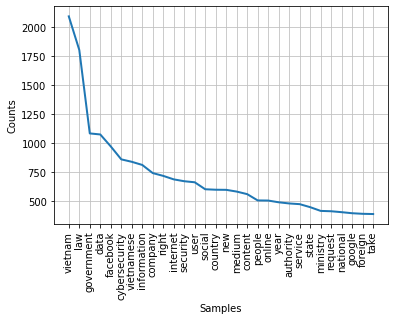

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [105]:
%matplotlib inline
fd = nltk.FreqDist(colText)
fd.plot(30)

In [106]:
fdnums = []
for sample in fd:
    fdnums.append(fd[sample])
numlist = list(map(int, fdnums))

In [107]:
print("Total of unique words:", len(numlist))
print("Total of words that appear only once:", len(fd.hapaxes()))
print("Percentage of words that appear only once:",'{:.2%}'.format(len(fd.hapaxes())/len(numlist)))

Total of unique words: 6964
Total of words that appear only once: 2495
Percentage of words that appear only once: 35.83%


In [108]:
datamean = statistics.mean(numlist)
print("Mean:", '{:.2f}'.format(statistics.mean(numlist)))
print("Standard Deviation:", '{:.2f}'.format(statistics.pstdev(numlist,datamean)))
print("Variance:", '{:.2f}'.format(statistics.pvariance(numlist,datamean)))

Mean: 15.24
Standard Deviation: 60.70
Variance: 3684.98


In [88]:
# filter results based on statistical test

# calulates the raw frequency as an actual number and percentage of total words
act = finder.ngram_fd.items()
raw = finder.score_ngrams(bigram_measures.raw_freq)
# student's - t score
tm = finder.score_ngrams(bigram_measures.student_t)
# pointwise mutual information score
pm = finder.score_ngrams(bigram_measures.pmi)
# chi-square score
ch = finder.score_ngrams(bigram_measures.chi_sq)
# log-likelihood ratio
log = finder.score_ngrams(bigram_measures.likelihood_ratio)

In [89]:
print(log)

[(('cybersecurity', 'law'), 2722.8684300374634), (('new', 'cybersecurity'), 578.8541042238153), (('law', 'cybersecurity'), 159.7140040424875), (('cybersecurity', 'bill'), 149.46165536316636), (('controversial', 'cybersecurity'), 87.30416706789812), (('culminate', 'cybersecurity'), 85.59890607003854), (('cybersecurity', 'taskforce'), 67.44176745998887), (('contentious', 'cybersecurity'), 59.84312124102991), (('cybersecurity', 'incident'), 57.737458106584675), (('cybersecurity', 'emergency'), 55.21876596636632), (('cybersecurity', 'coordination'), 42.77061104534157), (('draconian', 'cybersecurity'), 42.64618383128108), (('specialize', 'cybersecurity'), 40.16282836359798), (('zone', 'cybersecurity'), 39.27833817493236), (('cybersecurity', 'protection'), 32.81504897929385), (('violation', 'cybersecurity'), 32.81504897929385), (('tighten', 'cybersecurity'), 31.0777197682972), (('cybersecurity', 'legislation'), 30.799476946647726), (('obstacle', 'cybersecurity'), 30.05789002926857), (('earli

In [109]:
print(tabulate(log, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate                            Log-Likelihood
-----------------------------------  ----------------
('cybersecurity', 'law')             2722.868
('new', 'cybersecurity')             578.854
('law', 'cybersecurity')             159.714
('cybersecurity', 'bill')            149.462
('controversial', 'cybersecurity')   87.304
('culminate', 'cybersecurity')       85.599
('cybersecurity', 'taskforce')       67.442
('contentious', 'cybersecurity')     59.843
('cybersecurity', 'incident')        57.737
('cybersecurity', 'emergency')       55.219
('cybersecurity', 'coordination')    42.771
('draconian', 'cybersecurity')       42.646
('specialize', 'cybersecurity')      40.163
('zone', 'cybersecurity')            39.278
('cybersecurity', 'protection')      32.815
('violation', 'cybersecurity')       32.815
('tighten', 'cybersecurity')         31.078
('cybersecurity', 'legislation')     30.799
('obstacle', 'cybersecurity')        30.058
('earlier', 'cybersecurity')         29.482
('meet', 

In [110]:
# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, a in act:
    # first word
    prefix_keys[key[0]].append((key[1], a))
     # second word
    prefix_keys[key[1]].append((key[0], a))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

# remove the word privacy and display the first 50 results
actkeys = prefix_keys['cyber'][:30]

##################################################################
#### sorts list of RAW (expressed as percentage) frequencies #####
##################################################################

# group bigrams by first and second word in bigram                                         
prefix_keys = collections.defaultdict(list)
for key, r in raw:
    # first word
    prefix_keys[key[0]].append((key[1], r))
    # second word
    prefix_keys[key[1]].append((key[0], r))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

rawkeys = prefix_keys['cyber'][:30]

##################################################################
############### sorts list of log-likelihood scores ##############
##################################################################

# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, l in log:
    # first word
    prefix_keys[key[0]].append((key[1], l))
    # second word
    prefix_keys[key[1]].append((key[0], l))
    
# sort bigrams by strongest association                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

logkeys = prefix_keys['cyber'][:35]

In [111]:
from tabulate import tabulate
print(tabulate(logkeys, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate    Log-Likelihood
-----------  ----------------
